In [402]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [403]:
lead=pd.read_csv('Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [404]:
lead.shape

(9240, 37)

In [405]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [406]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [407]:
col=['Do Not Email','Do Not Call','Get updates on DM Content','Search','Newspaper Article','Magazine',
     'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
     'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
    'I agree to pay the amount through cheque','A free copy of Mastering The Interview']
def binary_mapping(x):
    return x.map({'Yes': 1, "No": 0})

lead[col] = lead[col].apply(binary_mapping)

In [408]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [409]:
lead.describe()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9240.000000,9240.000000,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,9240.000000,9240.0,9240.000000,...,9240.000000,9240.000000,9240.000000,9240.0,9240.0,9240.0,5022.000000,5022.000000,9240.0,9240.000000
mean,617188.435606,0.079437,0.000216,0.385390,3.445238,487.698268,2.362820,0.001515,0.0,0.000216,...,0.000108,0.000433,0.000758,0.0,0.0,0.0,14.306252,16.344883,0.0,0.312554
std,23405.995698,0.270435,0.014711,0.486714,4.854853,548.021466,2.161418,0.038898,0.0,0.014711,...,0.010403,0.020803,0.027515,0.0,0.0,0.0,1.386694,1.811395,0.0,0.463559
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,7.000000,11.000000,0.0,0.000000
25%,596484.500000,0.000000,0.000000,0.000000,1.000000,12.000000,1.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,14.000000,15.000000,0.0,0.000000
50%,615479.000000,0.000000,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,14.000000,16.000000,0.0,0.000000
75%,637387.250000,0.000000,0.000000,1.000000,5.000000,936.000000,3.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,15.000000,18.000000,0.0,1.000000
max,660737.000000,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,0.0,1.000000,...,1.000000,1.000000,1.000000,0.0,0.0,0.0,18.000000,20.000000,0.0,1.000000


In [410]:
lead.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
Tags                                             3353
What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Do Not Email                                        0
Do Not Call                 

In [411]:
round(100*(lead.isnull().sum().sort_values(ascending=False)/len(lead.index)), 2)

Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Tags                                             36.29
What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Cal

In [412]:
lead=lead.replace('Select', np.nan)

In [413]:
round(100*(lead.isnull().sum().sort_values(ascending=False)/len(lead.index)), 2)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Lead Numbe

In [414]:
x=lead.columns
drop_cols=[]
for i in x:
    #print(i)
    z=len(lead[i].unique())
    if z<2:
        print(i)
        print(lead[i].unique())
        drop_cols.append(i)
    

Magazine
[0]
Receive More Updates About Our Courses
[0]
Update me on Supply Chain Content
[0]
Get updates on DM Content
[0]
I agree to pay the amount through cheque
[0]


In [415]:
drop_cols

['Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [416]:
print(x[3])

Lead Source


In [417]:
lead[x[3]].isnull().sum()

36

In [418]:
for i in x:
    if lead[i].isnull().sum()/len(lead.index)>0.4 and i not in drop_cols:
        drop_cols.append(i)

In [419]:
drop_cols

['Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [420]:
lead=lead.drop(drop_cols,axis=1)

In [421]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,0,0,0,Interested in other courses,NaN,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,Ringing,NaN,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,Will revert after reading the email,Mumbai,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,0,0,0,Ringing,Mumbai,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,0,0,0,Will revert after reading the email,Mumbai,0,Modified


In [422]:
round(100*(lead.isnull().sum().sort_values(ascending=False)/len(lead.index)), 2)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Total Time Spent on Website                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Last Notable Activity                             0.00
A free copy of Mastering The Interview            0.00
Search    

In [423]:
lead.City.unique()

array([nan, 'Mumbai', 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

In [424]:
lead.Country.unique()

array([nan, 'India', 'Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
       'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
       'Hong Kong', 'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
       'Italy', 'South Africa', 'Tanzania', 'unknown', 'Malaysia',
       'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
       'Vietnam', 'Indonesia'], dtype=object)

In [425]:
lead['City'] = lead['City'].replace(np.nan, 'Other Cities')

In [426]:
lead.City.describe()

count             9240
unique               6
top       Other Cities
freq              4355
Name: City, dtype: object

In [427]:
lead['Country'] = lead['Country'].replace(np.nan, 'unknown')

In [428]:
lead.Country.describe()

count      9240
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [429]:
round(100*(lead.isnull().sum().sort_values(ascending=False)/len(lead.index)), 2)

Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Last Notable Activity                             0.00
Country                                           0.00
A free copy of Mastering The Interview            0.00
Search                                            0.00
Newspaper 

In [430]:
lead.Specialization.unique()

array([nan, 'Business Administration', 'Media and Advertising',
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [431]:
lead.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

In [432]:
lead['Specialization'] = lead['Specialization'].replace(np.nan, 'other')

In [433]:
round(100*(lead.isnull().sum().sort_values(ascending=False)/len(lead.index)), 2)

Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Last Notable Activity                             0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Specialization                                    0.00
Country                                           0.00
A free copy of Mastering The Interview            0.00
Search                                            0.00
Newspaper 

In [434]:
lead.Tags.unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', nan, 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [435]:
lead.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

In [436]:
lead['Tags'] = lead['Tags'].replace(np.nan, 'other')

In [437]:
lead=lead.rename(columns={"What matters most to you in choosing a course":"reason_of_choice"})

In [438]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'reason_of_choice', 'Search', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Tags',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [439]:
lead.reason_of_choice.unique()

array(['Better Career Prospects', nan, 'Flexibility & Convenience',
       'Other'], dtype=object)

In [440]:
lead.reason_of_choice.describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: reason_of_choice, dtype: object

In [441]:
lead=lead.drop(['reason_of_choice'],axis=1)

In [442]:
round(100*(lead.isnull().sum().sort_values(ascending=False)/len(lead.index)), 2)

What is your current occupation           29.11
TotalVisits                                1.48
Page Views Per Visit                       1.48
Last Activity                              1.11
Lead Source                                0.39
Last Notable Activity                      0.00
Lead Number                                0.00
Lead Origin                                0.00
Do Not Email                               0.00
Do Not Call                                0.00
Converted                                  0.00
Total Time Spent on Website                0.00
Country                                    0.00
A free copy of Mastering The Interview     0.00
Specialization                             0.00
Search                                     0.00
Newspaper Article                          0.00
X Education Forums                         0.00
Newspaper                                  0.00
Digital Advertisement                      0.00
Through Recommendations                 

In [443]:
lead=lead.rename(columns={"What is your current occupation":"occupation"})

In [444]:
lead.occupation.describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: occupation, dtype: object

In [445]:
lead.occupation.unique()

array(['Unemployed', 'Student', nan, 'Working Professional',
       'Businessman', 'Other', 'Housewife'], dtype=object)

In [446]:
lead['occupation'] = lead['occupation'].replace(np.nan, 'other')

In [447]:
round(100*(lead.isnull().sum().sort_values(ascending=False)/len(lead.index)), 2)

TotalVisits                               1.48
Page Views Per Visit                      1.48
Last Activity                             1.11
Lead Source                               0.39
Last Notable Activity                     0.00
A free copy of Mastering The Interview    0.00
Lead Number                               0.00
Lead Origin                               0.00
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
Total Time Spent on Website               0.00
Country                                   0.00
Specialization                            0.00
occupation                                0.00
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
Tags         

In [448]:
lead.shape

(9240, 24)

In [449]:
lead=lead[~pd.isnull(lead['TotalVisits'])]
lead=lead[~pd.isnull(lead['Page Views Per Visit'])]
lead=lead[~pd.isnull(lead['Last Activity'])]
lead=lead[~pd.isnull(lead['Lead Source'])]

In [450]:
lead.shape

(9074, 24)

In [451]:
round(100*(lead.isnull().sum().sort_values(ascending=False)/len(lead.index)), 2)

Last Notable Activity                     0.0
A free copy of Mastering The Interview    0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
Specialization                            0.0
occupation                                0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
Tags                              

In [452]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,0,0,0,Interested in other courses,Other Cities,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,Ringing,Other Cities,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,Will revert after reading the email,Mumbai,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,0,0,0,Ringing,Mumbai,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,0,0,0,Will revert after reading the email,Mumbai,0,Modified


In [453]:
lead=lead.drop(['Prospect ID'],axis=1)

In [454]:
lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,0,0,0,0,Interested in other courses,Other Cities,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,Ringing,Other Cities,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,Will revert after reading the email,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,0,0,0,0,Ringing,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,0,0,0,0,Will revert after reading the email,Mumbai,0,Modified


In [455]:
lead.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.078907,0.000220,0.378554,3.456028,482.887481,2.370151,0.001543,0.000220,0.000110,0.000110,0.000441,0.000771,0.318272
std,23348.029512,0.269608,0.014845,0.485053,4.858802,545.256560,2.160871,0.039251,0.014845,0.010498,0.010498,0.020992,0.027766,0.465831
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,615278.500000,0.000000,0.000000,0.000000,3.000000,246.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,637176.500000,0.000000,0.000000,1.000000,5.000000,922.750000,3.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
90%,650276.800000,0.000000,0.000000,1.000000,7.000000,1373.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
95%,655344.450000,1.000000,0.000000,1.000000,10.000000,1557.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
99%,659563.350000,1.000000,0.000000,1.000000,17.000000,1839.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [456]:
num_var=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

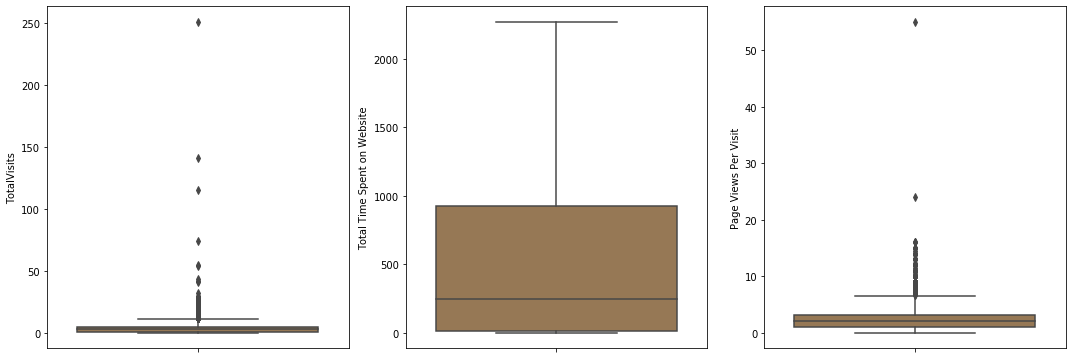

In [457]:
def boxplot(var_list):
    plt.figure(figsize=(15,10))
    for var in var_list:
        plt.subplot(2,3,var_list.index(var)+1)
        sns.boxplot(y=var,palette='cubehelix', data=lead,color='r')
    plt.tight_layout()
    plt.show()
    
boxplot(num_var)

In [458]:
#using caping technique to treat the outliers
cap = lead['TotalVisits'].quantile([0.1,0.95]).values
lead['TotalVisits'][lead['TotalVisits'] <= cap[0]] = cap[0]
lead['TotalVisits'][lead['TotalVisits'] >= cap[1]] = cap[1]

cap = lead['Total Time Spent on Website'].quantile([0.1,0.95]).values
lead['Total Time Spent on Website'][lead['Total Time Spent on Website'] <= cap[0]] = cap[0]
lead['Total Time Spent on Website'][lead['Total Time Spent on Website'] >= cap[1]] = cap[1]

cap = lead['Page Views Per Visit'].quantile([0.1,0.95]).values
lead['Page Views Per Visit'][lead['Page Views Per Visit'] <= cap[0]] = cap[0]
lead['Page Views Per Visit'][lead['Page Views Per Visit'] >= cap[1]] = cap[1]

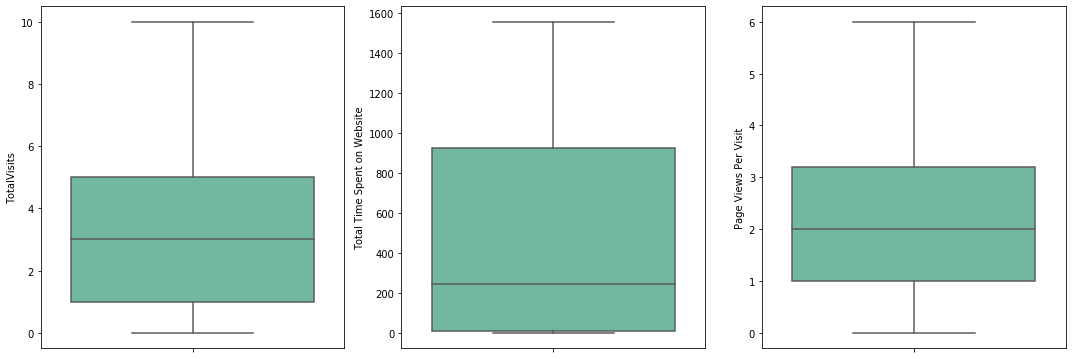

In [459]:
def boxplot(var_list):
    plt.figure(figsize=(15,10))
    for var in var_list:
        plt.subplot(2,3,var_list.index(var)+1)
        sns.boxplot(y=var,palette='BuGn_r', data=lead,color='r')
    plt.tight_layout()
    plt.show()
    
boxplot(num_var)

In [460]:
lead.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.078907,0.000220,0.378554,3.191867,474.472559,2.265943,0.001543,0.000220,0.000110,0.000110,0.000441,0.000771,0.318272
std,23348.029512,0.269608,0.014845,0.485053,2.780618,526.060205,1.790991,0.039251,0.014845,0.010498,0.010498,0.020992,0.027766,0.465831
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,615278.500000,0.000000,0.000000,0.000000,3.000000,246.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,637176.500000,0.000000,0.000000,1.000000,5.000000,922.750000,3.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
90%,650276.800000,0.000000,0.000000,1.000000,7.000000,1373.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
95%,655344.450000,1.000000,0.000000,1.000000,10.000000,1557.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
99%,659563.350000,1.000000,0.000000,1.000000,10.000000,1557.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [461]:
cat_var=lead.select_dtypes(exclude=['int', 'float']).columns
cat_var

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'Specialization', 'occupation', 'Tags', 'City',
       'Last Notable Activity'],
      dtype='object')

In [462]:
#creating dummy variables for categorical types
dum_var = pd.get_dummies(lead[cat_var], drop_first=True)

lead = pd.concat([lead, dum_var], axis=1)
lead.shape


(9074, 169)

In [463]:
lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [466]:
lead=lead.drop(cat_var,axis=1)

In [467]:
lead.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,1,2.0,1532,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,0,1.0,305,1.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,0,0,1,2.0,1428,1.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [468]:
lead.describe()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,...,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.078907,0.000220,0.378554,3.191867,474.472559,2.265943,0.001543,0.000220,0.000110,...,0.000110,0.001543,0.360040,0.020168,0.035045,0.000110,0.237161,0.003527,0.004959,0.000110
std,23348.029512,0.269608,0.014845,0.485053,2.780618,526.060205,1.790991,0.039251,0.014845,0.010498,...,0.010498,0.039251,0.480038,0.140581,0.183904,0.010498,0.425365,0.059283,0.070251,0.010498
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,615278.500000,0.000000,0.000000,0.000000,3.000000,246.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,637176.500000,0.000000,0.000000,1.000000,5.000000,922.750000,3.200000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,660737.000000,1.000000,1.000000,1.000000,10.000000,1557.000000,6.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [469]:
lead_c=lead.copy()

### now splitting the data into test and train sets

In [471]:
from sklearn.model_selection import train_test_split
X = lead.drop(['Converted','Lead Number'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [473]:
y = lead['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [474]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=100)

### Scaling the data

In [476]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scale.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5885,0,0,-1.149988,-0.904140,-1.266273,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8505,0,0,1.361344,2.053115,0.681968,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
894,0,0,1.720106,-0.835764,-0.152992,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6437,0,0,-1.149988,-0.904140,-1.266273,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2988,0,0,1.002582,1.435833,0.403648,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [478]:
conv_1 = (sum(lead['Converted'])/len(lead['Converted'].index))*100
conv_1

37.85541106458012

In [480]:
# model building 

import statsmodels.api as sm

log_m1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
log_m1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6805
Model:                            GLM   Df Residuals:                     6651
Model Family:                Binomial   Df Model:                          153
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1015.8
Date:                Mon, 02 Mar 2020   Deviance:                       2031.6
Time:                        15:52:07   Pearson chi2:                 1.45e+04
No. Iterations:                    26                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     24.9042   6.24e+05   3.99e-05      1.000   -1.22e+06    1.22e+06
Do Not Email                                              -1.4755      0.375     -3.933      0.000      -2.211      -0.740
Do Not Call                                               23.4611   4.96e+05   4.73e-05      1.000   -9.73e+05    9.73e+05
TotalVisits                                                0.3862      0.099      3.887      0.000       0.192       0.581
Total Time Spent on Website                                1.2493      0.073     17.108      0.000       1.106       1.392
Page Views Per Visit                                      -0.4105      0.113     -3.619      0.000      -0.633      -0.188
Search                                                    -1.1085      3.046     -0.364      0.716      -7.079       4.862
Newspaper Article                                         27.8339   2.52e+06    1.1e-05      1.000   -4.94e+06    4.94e+06
X Education Forums                                       -50.4269   2.53e+06     -2e-05      1.000   -4.95e+06    4.95e+06
Newspaper                                                -21.4965   1.03e+05     -0.000      1.000   -2.02e+05    2.01e+05
Digital Advertisement                                     -0.5768      5.206     -0.111      0.912     -10.779       9.626
Through Recommendations                                    1.9856     12.040      0.165      0.869     -21.612      25.584
A free copy of Mastering The Interview                    -0.2495      0.200     -1.247      0.212      -0.641       0.142
Lead Origin_Landing Page Submission                       -0.6486      0.275     -2.361      0.018      -1.187      -0.110
Lead Origin_Lead Add Form                                 -4.6365      3.545     -1.308      0.191     -11.584       2.312
Lead Origin_Lead Import                                   24.0044   3.07e+05   7.81e-05      1.000   -6.02e+05    6.02e+05
Lead Source_Direct Traffic                                -3.6216      4.831     -0.750      0.453     -13.091       5.847
Lead Source_Facebook                                     -29.0367   3.07e+05  -9.45e-05      1.000   -6.02e+05    6.02e+05
Lead Source_Google                                        -3.4917      4.829     -0.723      0.470     -12.956       5.973
Lead Source_Live Chat                                     21.9831   3.71e+05   5.92e-05      1.000   -7.27e+05    7.27e+05
Lead Source_NC_EDM                                        22.8674   2.15e+05      0.000      1.000   -4.22e+05    4.22e+05
Lead Source_Olark Chat                                    -4.0199      4.805     -0.837      0.403     -13.437       5.397
Lead Sou

In [481]:
# using RFE for coarse tuning

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train)

In [483]:
from sklearn.feature_selection import RFE
rfe = RFE(log_reg, 15)
rfe = rfe.fit(X_train, y_train)

In [484]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True, False, False, False,
       False,  True, False,  True,  True, False, False, False,  True,
       False, False,

In [485]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 2),
 ('Do Not Call', False, 108),
 ('TotalVisits', False, 43),
 ('Total Time Spent on Website', False, 7),
 ('Page Views Per Visit', False, 44),
 ('Search', False, 76),
 ('Newspaper Article', False, 135),
 ('X Education Forums', False, 104),
 ('Newspaper', False, 109),
 ('Digital Advertisement', False, 89),
 ('Through Recommendations', False, 117),
 ('A free copy of Mastering The Interview', False, 67),
 ('Lead Origin_Landing Page Submission', False, 24),
 ('Lead Origin_Lead Add Form', False, 47),
 ('Lead Origin_Lead Import', False, 57),
 ('Lead Source_Direct Traffic', False, 59),
 ('Lead Source_Facebook', False, 21),
 ('Lead Source_Google', False, 66),
 ('Lead Source_Live Chat', False, 136),
 ('Lead Source_NC_EDM', False, 18),
 ('Lead Source_Olark Chat', False, 58),
 ('Lead Source_Organic Search', False, 65),
 ('Lead Source_Pay per Click Ads', False, 139),
 ('Lead Source_Press_Release', False, 124),
 ('Lead Source_Reference', False, 50),
 ('Lead Source_Referra

In [486]:
col = X_train.columns[rfe.support_]

In [487]:
col

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'occupation_other', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Interested in Next batch', 'Tags_Lateral student',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_other', 'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_Modified'],
      dtype='object')

In [488]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement',
       ...
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=143)

In [489]:
# Assessing the model with StatsModels


X_train_sm = sm.add_constant(X_train[col])
log_m2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_m2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6805
Model:                            GLM   Df Residuals:                     6789
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1299.7
Date:                Mon, 02 Mar 2020   Deviance:                       2599.5
Time:                        15:58:35   Pearson chi2:                 1.20e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.2762      0.192    -17.023      0.000      -3.653      -2.899
Lead Source_Welingak Website                 2.6499      0.742      3.572      0.000       1.196       4.104
Last Activity_SMS Sent                       2.3023      0.120     19.224      0.000       2.068       2.537
occupation_other                            -2.4915      0.142    -17.569      0.000      -2.769      -2.214
Tags_Busy                                    2.2528      0.282      7.976      0.000       1.699       2.806
Tags_Closed by Horizzon                      9.0262      0.740     12.190      0.000       7.575      10.477
Tags_Interested in Next batch               25.5400   6.55e+04      0.000      1.000   -1.28e+05    1.28e+05
Tags_Lateral student                        26.7838   7.37e+04      0.000      1.000   -1.44e+05    1.44e+05
Tags_Lost to EINS                            9.1018      0.649     14.035      0.000       7.831      10.373
Tags_Ringing                                -1.7045      0.297     -5.745      0.000      -2.286      -1.123
Tags_Will revert after reading the email     6.7183      0.250     26.831      0.000       6.228       7.209
Tags_invalid number                        -22.4455   1.47e+04     -0.002      0.999   -2.89e+04    2.88e+04
Tags_other                                   3.6269      0.219     16.546      0.000       3.197       4.057
Tags_switched off                           -1.9446      0.551     -3.532      0.000      -3.024      -0.866
Tags_wrong number given                    -22.3998   2.01e+04     -0.001      0.999   -3.94e+04    3.94e+04
Last Notable Activity_Modified              -1.6057      0.123    -13.006      0.000      -1.848      -1.364
============================================================================================================
"""

In [491]:
#predicting on train set

y_train_pred = res.predict(X_train_sm)
y_train_pred.head()

5885    0.023057
8505    0.996810
894     0.105194
6437    0.036397
2988    0.540281
dtype: float64

In [492]:
# reshaping to form an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:5]

array([0.02305712, 0.99680959, 0.10519428, 0.03639674, 0.54028136])

In [496]:
# checking conversion probability with the conversions

y_train_pred_final = pd.DataFrame({'Conv':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['Lead_ID'] = y_train.index
y_train_pred_final[:5]

,Conv,Conv_Prob,Lead_ID
0,0,0.023057,5885
1,1,0.996810,8505
2,0,0.105194,894
3,0,0.036397,6437
4,1,0.540281,2988


In [498]:
# predicting conversion based on the probability, using 0.5 as cut-off

y_train_pred_final['pred'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Conv,Conv_Prob,Lead_ID,pred
0,0,0.023057,5885,0
1,1,0.996810,8505,1
2,0,0.105194,894,0
3,0,0.036397,6437,0
4,1,0.540281,2988,1


In [499]:
# now we will check how accurately have the conversions been 

from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Conv, y_train_pred_final.pred )
print(confusion)

[[3949  249]
 [ 213 2394]]


In [502]:
# FROM ABOVE CONFUSION MATRIX WE GET TN=3949,FP=249,FN=213,TP=2349
# lets calculate all the metrics used for assessing the model

print(metrics.accuracy_score(y_train_pred_final.Conv, y_train_pred_final.pred))

0.9321087435709038


In [504]:
# using VIF to eliminate variables of less importance
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source_Welingak Website,1.14
3,Tags_Busy,1.05
4,Tags_Closed by Horizzon,1.05
7,Tags_Lost to EINS,1.05
12,Tags_switched off,1.03
10,Tags_invalid number,1.01
13,Tags_wrong number given,1.01
5,Tags_Interested in Next batch,1.00
6,Tags_Lateral student,1.00
2,occupation_other,0.50


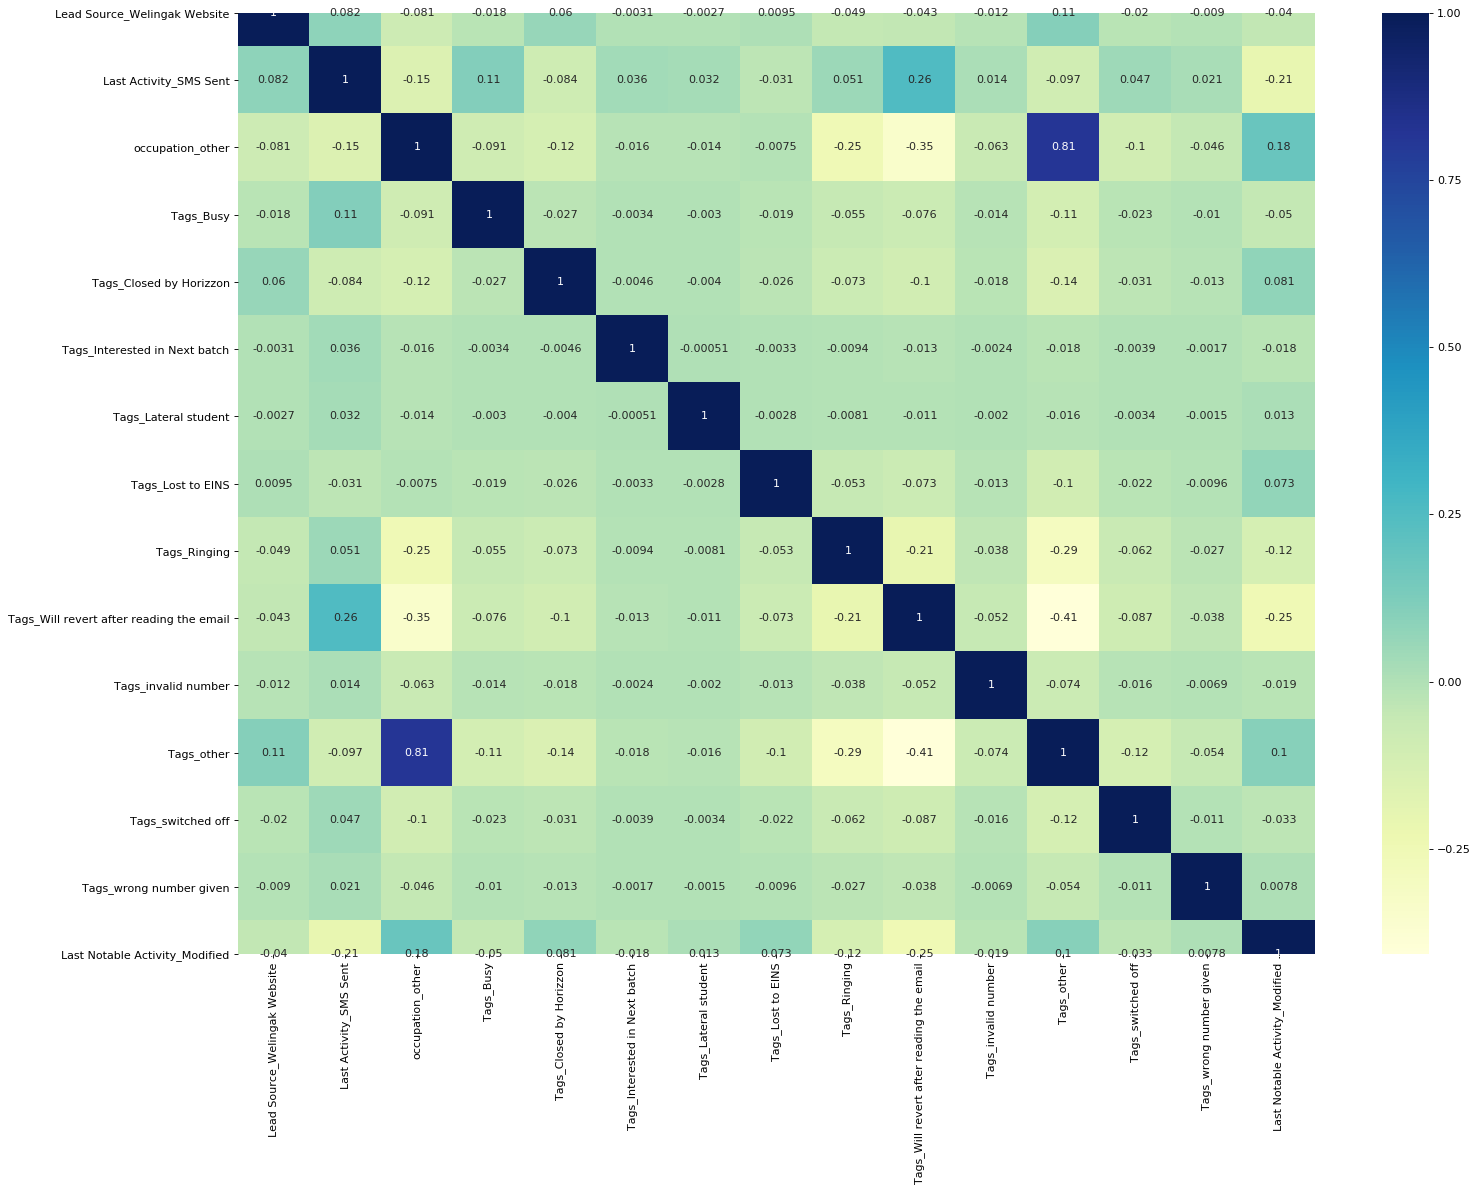

In [508]:
plt.figure(figsize=(20,15), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

In [510]:
#dropping varibles based on both p-value and VIF
col=col.drop('Tags_Interested in Next batch')


KeyError: "['Tags_Interested in Next batch'] not found in axis"

In [511]:
col

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'occupation_other', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lateral student', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_other', 'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_Modified'],
      dtype='object')

In [512]:
X_train_sm = sm.add_constant(X_train[col])
log_m3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_m3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6805
Model:                            GLM   Df Residuals:                     6790
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1304.7
Date:                Mon, 02 Mar 2020   Deviance:                       2609.5
Time:                        16:56:18   Pearson chi2:                 1.22e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.1877      0.184    -17.344      0.000      -3.548      -2.827
Lead Source_Welingak Website                 2.6492      0.742      3.569      0.000       1.194       4.104
Last Activity_SMS Sent                       2.3307      0.120     19.492      0.000       2.096       2.565
occupation_other                            -2.4996      0.142    -17.569      0.000      -2.778      -2.221
Tags_Busy                                    2.1471      0.277      7.760      0.000       1.605       2.689
Tags_Closed by Horizzon                      8.9498      0.738     12.120      0.000       7.503      10.397
Tags_Lateral student                        26.6796   7.37e+04      0.000      1.000   -1.44e+05    1.44e+05
Tags_Lost to EINS                            9.0295      0.647     13.965      0.000       7.762      10.297
Tags_Ringing                                -1.8169      0.291     -6.250      0.000      -2.387      -1.247
Tags_Will revert after reading the email     6.6344      0.244     27.177      0.000       6.156       7.113
Tags_invalid number                        -22.5552   1.47e+04     -0.002      0.999   -2.88e+04    2.88e+04
Tags_other                                   3.5370      0.212     16.701      0.000       3.122       3.952
Tags_switched off                           -2.0587      0.547     -3.761      0.000      -3.131      -0.986
Tags_wrong number given                    -22.5095   2.01e+04     -0.001      0.999   -3.93e+04    3.93e+04
Last Notable Activity_Modified              -1.6206      0.123    -13.141      0.000      -1.862      -1.379
============================================================================================================
"""

In [518]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:5]

5885    0.022515
8505    0.996913
894     0.104310
6437    0.039632
2988    0.545007
dtype: float64

In [519]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:5]

array([0.02251472, 0.99691316, 0.10430969, 0.03963202, 0.54500719])

In [520]:
y_train_pred_final = pd.DataFrame({'Conv':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['Lead_ID'] = y_train.index
y_train_pred_final.head()

,Conv,Conv_Prob,Lead_ID
0,0,0.022515,5885
1,1,0.996913,8505
2,0,0.104310,894
3,0,0.039632,6437
4,1,0.545007,2988


In [521]:
y_train_pred_final['pred'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Conv,Conv_Prob,Lead_ID,pred
0,0,0.022515,5885,0
1,1,0.996913,8505,1
2,0,0.104310,894,0
3,0,0.039632,6437,0
4,1,0.545007,2988,1


In [523]:
confusion = metrics.confusion_matrix(y_train_pred_final.Conv, y_train_pred_final.pred )
print(confusion)

[[3949  249]
 [ 217 2390]]


In [524]:
print(metrics.accuracy_score(y_train_pred_final.Conv, y_train_pred_final.pred))

0.9315209404849375


In [525]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source_Welingak Website,1.14
3,Tags_Busy,1.05
4,Tags_Closed by Horizzon,1.05
6,Tags_Lost to EINS,1.05
11,Tags_switched off,1.03
9,Tags_invalid number,1.01
12,Tags_wrong number given,1.01
5,Tags_Lateral student,1.00
2,occupation_other,0.50
10,Tags_other,0.37


In [526]:
#dropping a varible Tags_invalid number
col=col.drop('Tags_invalid number')


In [527]:
col

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'occupation_other', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lateral student', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_other',
       'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_Modified'],
      dtype='object')

In [528]:
X_train_sm = sm.add_constant(X_train[col])
log_m4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_m4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6805
Model:                            GLM   Df Residuals:                     6791
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1312.9
Date:                Mon, 02 Mar 2020   Deviance:                       2625.7
Time:                        17:12:54   Pearson chi2:                 1.19e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.3983      0.186    -18.307      0.000      -3.762      -3.035
Lead Source_Welingak Website                 2.6505      0.741      3.575      0.000       1.197       4.104
Last Activity_SMS Sent                       2.2811      0.118     19.328      0.000       2.050       2.512
occupation_other                            -2.4857      0.141    -17.586      0.000      -2.763      -2.209
Tags_Busy                                    2.3873      0.274      8.708      0.000       1.850       2.925
Tags_Closed by Horizzon                      9.1375      0.739     12.357      0.000       7.688      10.587
Tags_Lateral student                        25.9158   4.47e+04      0.001      1.000   -8.76e+04    8.77e+04
Tags_Lost to EINS                            9.2104      0.647     14.227      0.000       7.942      10.479
Tags_Ringing                                -1.5647      0.288     -5.438      0.000      -2.129      -1.001
Tags_Will revert after reading the email     6.8361      0.246     27.786      0.000       6.354       7.318
Tags_other                                   3.7497      0.213     17.619      0.000       3.333       4.167
Tags_switched off                           -1.8036      0.546     -3.306      0.001      -2.873      -0.734
Tags_wrong number given                    -21.2618   1.22e+04     -0.002      0.999   -2.39e+04    2.39e+04
Last Notable Activity_Modified              -1.5924      0.123    -12.938      0.000      -1.834      -1.351
============================================================================================================
"""

In [529]:
#dropping Tags_Lateral student
col=col.drop('Tags_Lateral student')

In [530]:
col

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'occupation_other', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_other',
       'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_Modified'],
      dtype='object')

In [531]:
X_train_sm = sm.add_constant(X_train[col])
log_m4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_m4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6805
Model:                            GLM   Df Residuals:                     6792
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1319.7
Date:                Mon, 02 Mar 2020   Deviance:                       2639.4
Time:                        17:13:52   Pearson chi2:                 1.19e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.3314      0.180    -18.519      0.000      -3.684      -2.979
Lead Source_Welingak Website                 2.6489      0.741      3.573      0.000       1.196       4.102
Last Activity_SMS Sent                       2.3002      0.118     19.533      0.000       2.069       2.531
occupation_other                            -2.4925      0.142    -17.612      0.000      -2.770      -2.215
Tags_Busy                                    2.3041      0.270      8.520      0.000       1.774       2.834
Tags_Closed by Horizzon                      9.0561      0.738     12.274      0.000       7.610      10.502
Tags_Lost to EINS                            9.1350      0.646     14.149      0.000       7.870      10.400
Tags_Ringing                                -1.6486      0.284     -5.804      0.000      -2.205      -1.092
Tags_Will revert after reading the email     6.7594      0.241     27.994      0.000       6.286       7.233
Tags_other                                   3.6761      0.208     17.692      0.000       3.269       4.083
Tags_switched off                           -1.8884      0.544     -3.474      0.001      -2.954      -0.823
Tags_wrong number given                    -21.3462   1.22e+04     -0.002      0.999   -2.39e+04    2.39e+04
Last Notable Activity_Modified              -1.5755      0.122    -12.874      0.000      -1.815      -1.336
============================================================================================================
"""

In [532]:
#dropping Tags_wrong number given
col=col.drop('Tags_wrong number given')

In [533]:
X_train_sm = sm.add_constant(X_train[col])
log_m5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_m5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6805
Model:                            GLM   Df Residuals:                     6793
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1323.5
Date:                Mon, 02 Mar 2020   Deviance:                       2647.0
Time:                        17:14:34   Pearson chi2:                 1.18e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.4231      0.181    -18.943      0.000      -3.777      -3.069
Lead Source_Welingak Website                 2.6496      0.741      3.576      0.000       1.197       4.102
Last Activity_SMS Sent                       2.2788      0.117     19.437      0.000       2.049       2.509
occupation_other                            -2.4864      0.141    -17.616      0.000      -2.763      -2.210
Tags_Busy                                    2.4091      0.269      8.944      0.000       1.881       2.937
Tags_Closed by Horizzon                      9.1407      0.738     12.383      0.000       7.694      10.588
Tags_Lost to EINS                            9.2163      0.646     14.269      0.000       7.950      10.482
Tags_Ringing                                -1.5389      0.283     -5.441      0.000      -2.093      -0.985
Tags_Will revert after reading the email     6.8489      0.242     28.286      0.000       6.374       7.323
Tags_other                                   3.7694      0.208     18.108      0.000       3.361       4.177
Tags_switched off                           -1.7775      0.543     -3.274      0.001      -2.842      -0.713
Last Notable Activity_Modified              -1.5667      0.122    -12.812      0.000      -1.806      -1.327
============================================================================================================
"""

In [534]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source_Welingak Website,1.14
3,Tags_Busy,1.05
4,Tags_Closed by Horizzon,1.05
5,Tags_Lost to EINS,1.05
9,Tags_switched off,1.03
2,occupation_other,0.50
8,Tags_other,0.37
7,Tags_Will revert after reading the email,0.22
6,Tags_Ringing,0.15
10,Last Notable Activity_Modified,0.08


In [535]:
# now all the p-value and VIF are low enough to proceed
# now let us check for metrics to asses the model


TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [536]:
#sensitivity
TP / float(TP+FN)

0.9167625623321826

In [537]:
#specificity
TN / float(TN+FP)

0.9406860409718913

In [539]:
#FPR(False positive rate)
FP/ float(TN+FP)

0.059313959028108626

In [540]:
#positive predictive value
TP / float(TP+FP)

0.9056460780598712

In [541]:
#negative predictive value
TN / float(TN+ FN)

0.9479116658665386

In [542]:
#ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [543]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Conv,
                                         y_train_pred_final.Conv_Prob, drop_intermediate = False )

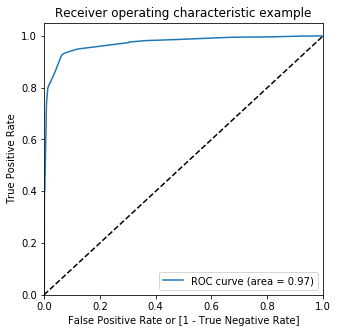

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.38208671e-04,
        2.38208671e-04, 2.38208671e-04, 2.38208671e-04, 4.76417342e-04,
        4.76417342e-04, 4.76417342e-04, 9.52834683e-04, 1.19104335e-03,
        1.19104335e-03, 1.19104335e-03, 1.19104335e-03, 1.19104335e-03,
        2.85850405e-03, 3.09671272e-03, 3.09671272e-03, 3.57313006e-03,
        7.38446879e-03, 7.38446879e-03, 7.38446879e-03, 8.81372082e-03,
        1.28632682e-02, 1.28632682e-02, 1.28632682e-02, 1.92949023e-02,
        2.12005717e-02, 4.09718914e-02, 5.93139590e-02, 6.05050024e-02,
        6.43163411e-02, 6.95569319e-02, 8.43258695e-02, 1.20057170e-01,
        2.91567413e-01, 3.03239638e-01, 3.04430681e-01, 3.69223440e-01,
        3.85659838e-01, 4.84516436e-01, 6.63411148e-01, 6.72701286e-01,
        6.73892330e-01, 8.17293949e-01, 9.14244879e-01, 9.27584564e-01,
        9.62601239e-01, 9.71653168e-01, 9.76655550e-01, 9.792758

In [544]:
draw_roc(y_train_pred_final.Conv, y_train_pred_final.Conv_Prob)

In [545]:
# as seen in the graph area under curve is 0.97 
# now we have to find an optimal cut-off point

n = [float(x)/10 for x in range(10)]
for i in n:
    y_train_pred_final[i]= y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Conv,Conv_Prob,Lead_ID,pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.022515,5885,0,1,0,0,0,0,0,0,0,0,0
1,1,0.996913,8505,1,1,1,1,1,1,1,1,1,1,1
2,0,0.104310,894,0,1,1,0,0,0,0,0,0,0,0
3,0,0.039632,6437,0,1,0,0,0,0,0,0,0,0,0
4,1,0.545007,2988,1,1,1,1,1,1,1,0,0,0,0


In [549]:
cutoff_lead = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

cut_num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in cut_num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Conv, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_lead.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_lead)

     prob  accuracy     sensi     speci
0.0   0.0  0.383101  1.000000  0.000000
0.1   0.1  0.809699  0.972766  0.708433
0.2   0.2  0.924173  0.937860  0.915674
0.3   0.3  0.932109  0.920215  0.939495
0.4   0.4  0.932109  0.920215  0.939495
0.5   0.5  0.931521  0.916763  0.940686
0.6   0.6  0.916826  0.817031  0.978799
0.7   0.7  0.916826  0.817031  0.978799
0.8   0.8  0.914034  0.796318  0.987137
0.9   0.9  0.896400  0.743767  0.991186


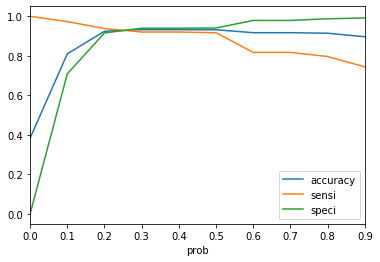

In [550]:
#now lets plot the three metrics to find intersecting(optimum) point

cutoff_lead.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [551]:
# from the plot we will take 0.25 as the cut-off
y_train_pred_final['final_predicted'] = y_train_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.25 else 0)

y_train_pred_final.head()

,Conv,Conv_Prob,Lead_ID,pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.022515,5885,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.996913,8505,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.104310,894,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.039632,6437,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.545007,2988,1,1,1,1,1,1,1,0,0,0,0,1


In [552]:
metrics.accuracy_score(y_train_pred_final.Conv, y_train_pred_final.final_predicted)

0.9307861866274798

In [553]:
conf_1 = metrics.confusion_matrix(y_train_pred_final.Conv, y_train_pred_final.final_predicted)
conf_1

array([[3906,  292],
       [ 179, 2428]])

In [555]:
TP = conf_1[1,1] 
TN = conf_1[0,0] 
FP = conf_1[0,1] 
FN = conf_1[1,0]

In [556]:
#sensitivity
TP / float(TP+FN)

0.9313387034906022

In [557]:
#specificity
TN / float(TN+FP)

0.9304430681276799

In [558]:
#FPR(False Positive Rate)
FP/ float(TN+FP)

0.06955693187232015

In [559]:
#positive predictive value
print (TP / float(TP+FP))

0.8926470588235295


In [560]:
#negative predictive value
TN / float(TN+ FN)

0.9561811505507956

In [561]:
#calculating precision
precision = TP / float(TP + FP)
precision

0.8926470588235295

In [562]:
recall = TP / float(TP + FN)
recall

0.9313387034906022

In [564]:
# lets see trade-off between precision and recall
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Conv, y_train_pred_final.final_predicted


(0       0
 1       1
 2       0
 3       0
 4       1
        ..
 6800    0
 6801    1
 6802    0
 6803    0
 6804    0
 Name: Conv, Length: 6805, dtype: int64, 0       0
 1       1
 2       0
 3       0
 4       1
        ..
 6800    0
 6801    1
 6802    0
 6803    0
 6804    0
 Name: final_predicted, Length: 6805, dtype: int64)

In [567]:
pr, re, thresholds = precision_recall_curve(y_train_pred_final.Conv, y_train_pred_final.Conv_Prob)

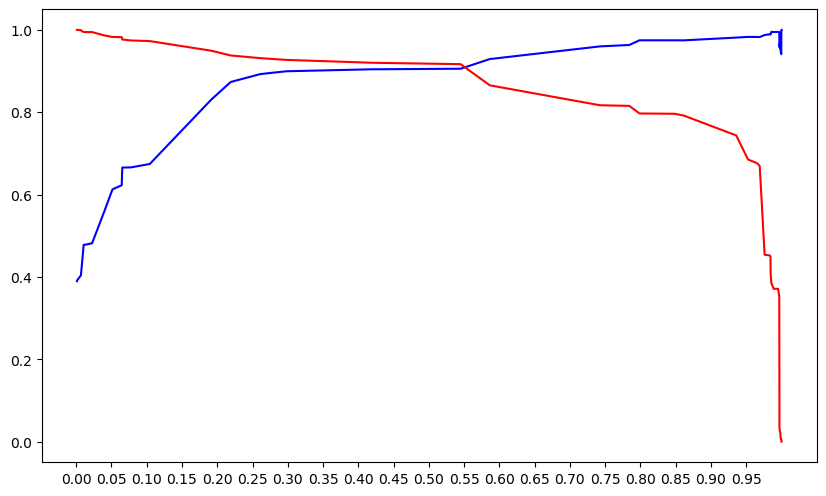

In [568]:
plt.figure(figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, pr[:-1], "b-")
plt.plot(thresholds, re[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

In [569]:
#now let us check the model on test set

X_test[['TotalVisits','Total Time Spent on Website',
        'Page Views Per Visit']] = scale.transform(X_test[['TotalVisits',
        'Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,0,0,0.285059,-0.605945,0.960288,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1490,0,0,0.643820,1.969545,1.516929,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7936,0,0,-0.432465,-0.763589,-0.152992,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4216,0,0,-1.149988,-0.904140,-1.266273,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3830,0,0,1.720106,-0.592650,2.073569,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [572]:
X_test = X_test[col]
X_test.head()

,Lead Source_Welingak Website,Last Activity_SMS Sent,occupation_other,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_other,Tags_switched off,Last Notable Activity_Modified
3271,0,0,1,0,0,0,0,0,1,0,0
1490,0,0,0,0,0,0,0,1,0,0,0
7936,0,0,1,0,0,0,0,0,1,0,0
4216,0,0,0,0,1,0,0,0,0,0,1
3830,0,0,1,0,0,0,0,0,1,0,0


In [573]:
X_test_sm = sm.add_constant(X_test)

In [575]:
y_test_pred = res.predict(X_test_sm)
y_test_pred.head()

3271    0.105255
1490    0.968501
7936    0.105255
4216    0.984494
3830    0.105255
dtype: float64

In [577]:
y_pred_df = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)

In [582]:
y_test_df.head()

,Converted
0,0
1,1
2,0
3,1
4,0


In [583]:
y_pred_df

,0
0,0.105255
1,0.968501
2,0.105255
3,0.984494
4,0.105255
...,...
2264,0.005483
2265,0.534602
2266,0.105255
2267,0.006761


In [584]:
y_pred_df= y_pred_df.rename(columns={ 0 : 'Conv_Prob'})

In [585]:
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final.head()

,Converted,Conv_Prob
0,0,0.105255
1,1,0.968501
2,0,0.105255
3,1,0.984494
4,0,0.105255


In [588]:
y_pred_final['pred'] = y_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.25 else 0)
y_pred_final.head()

,Converted,Conv_Prob,pred
0,0,0.105255,0
1,1,0.968501,1
2,0,0.105255,0
3,1,0.984494,1
4,0,0.105255,0


In [590]:
acc_test=metrics.accuracy_score(y_pred_final.Converted, y_pred_final.pred)
acc_test

0.9308065226972234

In [591]:
conf_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.pred )
print(conf_test)

[[1346   95]
 [  62  766]]


In [592]:
TP = conf_test[1,1] 
TN = conf_test[0,0]
FP = conf_test[0,1]
FN = conf_test[1,0]

In [593]:
#Sensitivity
TP / float(TP + FN)

0.9251207729468599

In [594]:
#Specificity
TN / float(TN + FP)

0.9340735600277585

In [595]:
#False Postive Rate
FP / float(TN + FP)

0.0659264399722415

In [596]:
#Positive Predictive Value
TP / float(TP + FP)


0.8896631823461092

In [598]:
#Negative Predictive Value
TN / float(TN + FN)

0.9559659090909091

In [599]:
#Precision
TP / float(TP + FP)

0.8896631823461092

In [600]:
#Recall
TP / float(TP + FN)

0.9251207729468599

In [601]:
#from the above metrics the model is performing quite well on the test set too

# now we'll see ROC for test data

fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted
                                         , y_pred_final.Conv_Prob, drop_intermediate = False )

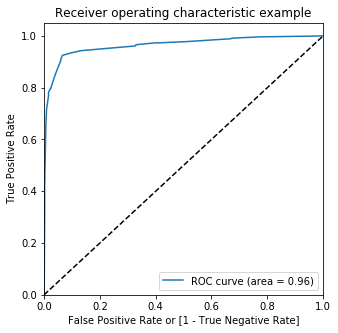

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.93962526e-04,
        6.93962526e-04, 2.08188758e-03, 2.08188758e-03, 2.08188758e-03,
        2.08188758e-03, 2.08188758e-03, 2.08188758e-03, 6.24566273e-03,
        6.24566273e-03, 6.24566273e-03, 9.02151284e-03, 1.59611381e-02,
        1.59611381e-02, 2.15128383e-02, 2.29007634e-02, 4.02498265e-02,
        5.96807772e-02, 5.96807772e-02, 6.59264400e-02, 7.42539903e-02,
        9.78487162e-02, 1.33240805e-01, 3.26856350e-01, 3.29632200e-01,
        3.88619015e-01, 3.99028452e-01, 4.14295628e-01, 5.12838307e-01,
        6.68979875e-01, 6.73143650e-01, 6.74531575e-01, 7.73074254e-01,
        9.23664122e-01, 9.44482998e-01, 9.82650937e-01, 9.92366412e-01,
        1.00000000e+00]),
 array([0.        , 0.00241546, 0.00483092, 0.00724638, 0.01086957,
        0.01570048, 0.01811594, 0.02536232, 0.06038647, 0.32125604,
        0.33091787, 0.35628019, 0.39009662, 0.

In [602]:
draw_roc(y_pred_final.Converted, y_pred_final.Conv_Prob)

In [608]:
#area under the curve=0.96 which means the model explains 96% of probability conversions

# now let us give a lead score for more interpretability

lead_test_pred = y_pred_final.copy()
lead_test_pred.rename(columns = {'pred':'final_predicted'}, inplace = True)
lead_test_pred.head()

,Converted,Conv_Prob,final_predicted
0,0,0.105255,0
1,1,0.968501,1
2,0,0.105255,0
3,1,0.984494,1
4,0,0.105255,0


In [627]:
lead_train_pred = y_train_pred_final.copy()
lead_train_pred.rename(columns = {'Conv':'Converted'}, inplace = True)
lead_train_pred.head()

,Converted,Conv_Prob,Lead_ID,pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.022515,5885,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.996913,8505,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.104310,894,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.039632,6437,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.545007,2988,1,1,1,1,1,1,1,0,0,0,0,1


In [630]:
lead_train_pred = lead_train_pred[['Lead_ID','Converted','Conv_Prob','final_predicted']]
lead_train_pred.head()

,Lead_ID,Converted,Conv_Prob,final_predicted
0,5885,0,0.022515,0
1,8505,1,0.996913,1
2,894,0,0.104310,0
3,6437,0,0.039632,0
4,2988,1,0.545007,1


In [631]:
lead_finalpred = lead_train_pred.append(lead_test_pred)
lead_finalpred.head()

,Conv_Prob,Converted,Lead_ID,final_predicted
0,0.022515,0,5885.0,0
1,0.996913,1,8505.0,1
2,0.104310,0,894.0,0
3,0.039632,0,6437.0,0
4,0.545007,1,2988.0,1


In [632]:
lead_finalpred.shape

(9074, 4)

In [633]:
#applying lead score to total data set
lead_finalpred['Lead_Score'] = lead_finalpred['Conv_Prob'].apply(lambda x : round(x*100))
lead_finalpred.head()

,Conv_Prob,Converted,Lead_ID,final_predicted,Lead_Score
0,0.022515,0,5885.0,0,2
1,0.996913,1,8505.0,1,100
2,0.104310,0,894.0,0,10
3,0.039632,0,6437.0,0,4
4,0.545007,1,2988.0,1,55


In [635]:
lead_finalpred = lead_finalpred.set_index('Lead_ID').sort_index(axis = 0, ascending = True)
lead_finalpred.head()

,Conv_Prob,Converted,final_predicted,Lead_Score
Lead_ID,,,,
1.0,0.006663,0,0,1
2.0,0.969135,1,1,97
4.0,0.861306,1,1,86
5.0,0.022515,0,0,2
6.0,0.861306,1,1,86


In [636]:
lead_c = lead_c[['Lead Number']]
lead_c.head()

,Lead Number
0,660737
1,660728
2,660727
3,660719
4,660681


In [647]:
#merging both dataframes
lead_final_score = pd.concat([lead_c, lead_finalpred], axis=1)


In [648]:
lead_final_score=lead_final_score[~pd.isnull(lead_final_score['Converted'])]
lead_final_score=lead_final_score[~pd.isnull(lead_final_score['final_predicted'])]
lead_final_score=lead_final_score[~pd.isnull(lead_final_score['Lead_Score'])]
lead_final_score=lead_final_score[~pd.isnull(lead_final_score['Conv_Prob'])]

In [649]:
lead_final_score.shape

(6805, 5)

In [650]:
lead_final_score.head(10)

,Lead Number,Conv_Prob,Converted,final_predicted,Lead_Score
1.0,660728.0,0.006663,0.0,0.0,1.0
2.0,660727.0,0.969135,1.0,1.0,97.0
4.0,660681.0,0.861306,1.0,1.0,86.0
5.0,660680.0,0.022515,0.0,0.0,2.0
6.0,660673.0,0.861306,1.0,1.0,86.0
7.0,660664.0,0.022515,0.0,0.0,2.0
8.0,660624.0,0.104310,0.0,0.0,10.0
9.0,660616.0,0.104310,0.0,0.0,10.0
11.0,660570.0,0.997105,1.0,1.0,100.0
14.0,660553.0,0.586463,0.0,1.0,59.0


In [654]:
par = res.params[1:]
par

Lead Source_Welingak Website                2.649625
Last Activity_SMS Sent                      2.278789
occupation_other                           -2.486409
Tags_Busy                                   2.409147
Tags_Closed by Horizzon                     9.140704
Tags_Lost to EINS                           9.216289
Tags_Ringing                               -1.538909
Tags_Will revert after reading the email    6.848899
Tags_other                                  3.769350
Tags_switched off                          -1.777513
Last Notable Activity_Modified             -1.566684
dtype: float64

In [656]:
f_imp = par
f_imp = 100.0 * (f_imp / f_imp.max())
f_imp

Lead Source_Welingak Website                 28.749370
Last Activity_SMS Sent                       24.725665
occupation_other                            -26.978414
Tags_Busy                                    26.140102
Tags_Closed by Horizzon                      99.179868
Tags_Lost to EINS                           100.000000
Tags_Ringing                                -16.697707
Tags_Will revert after reading the email     74.312978
Tags_other                                   40.898784
Tags_switched off                           -19.286649
Last Notable Activity_Modified              -16.999078
dtype: float64

In [657]:
f_sorted_score = np.argsort(f_imp,kind='quicksort',order='list of str')
f_sorted_score

Lead Source_Welingak Website                 2
Last Activity_SMS Sent                       9
occupation_other                            10
Tags_Busy                                    6
Tags_Closed by Horizzon                      1
Tags_Lost to EINS                            3
Tags_Ringing                                 0
Tags_Will revert after reading the email     8
Tags_other                                   7
Tags_switched off                            4
Last Notable Activity_Modified               5
dtype: int64

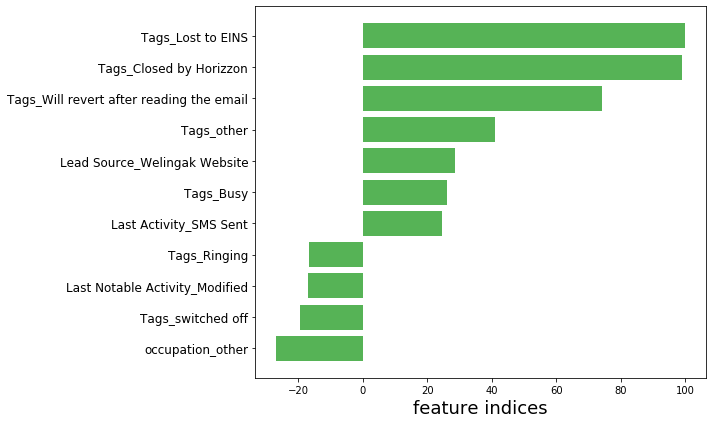

In [660]:
pos = np.arange(f_sorted_score.shape[0]) + .5

fig = plt.figure(figsize=(10,6))
f_lead = fig.add_subplot(1, 1, 1)
f_lead.barh(pos, f_imp[f_sorted_score], align='center', color = 'tab:green',alpha=0.8)
f_lead.set_yticks(pos)
f_lead.set_yticklabels(np.array(X_train[col].columns)[f_sorted_score], fontsize=12)
f_lead.set_xlabel('feature indices', fontsize=18)

plt.tight_layout()   
plt.show()


### Major factors affecting lead conversion are:
### 1.Tags_Lost to EINS
### 2.Tags_Closed by Horizzon
### 3.Tags_Will revert after reading the email